In [1]:
from pyEDM import *
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import rasterio
import xarray as xr
from tqdm import tqdm
import datetime
import scipy.stats
from datetime import datetime
from sklearn.metrics import r2_score

import dask.dataframe as dd
import dask
dask.config.set(scheduler='threads')

from scipy import stats
from rasterio.plot import show
import geopandas as gpd
import fiona
import rasterio.mask

In [12]:
predictions_tables = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/predictions_tables/'
predictions_tables_crunch = '/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/predictions_tables/'

In [3]:
observations_tables = '/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/observations_tables/'

In [16]:
def generate_dekads(start, end):
    '''
    Generates list of timestamps of dekads between two dates
    
    Parameters
    ----------
    start : pd.datetime object
        Start date of list
    end : pd.datetime object
        end date of list
    '''
    
    dtrange = pd.date_range(start, end)
    days = list(range(len(dtrange))) #length of dtrange
    daysDF = pd.DataFrame({'Days': days}, index=dtrange)
    d = daysDF.index.day - np.clip((daysDF.index.day-1) // 10, 0, 2)*10 - 1 
    dekaddates = daysDF.index.values - np.array(d, dtype="timedelta64[D]")
    dekads = daysDF.groupby(dekaddates).mean()
    dekads = dekads.index
    
    return dekads

In [27]:
start = pd.datetime(2002,7,1)
end = pd.datetime(2019,4,30)

dekads = generate_dekads(start, end)

In [17]:
dekads_pi18 = generate_dekads(pd.datetime(2002,8, 21), pd.datetime(2019,10,21))

In [6]:
ndvi_table_anomT = pd.read_csv(observations_tables + 'ndvi_table_anomT.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])

In [28]:
ndvi_table_anom = ndvi_table_anomT.T

In [30]:
ndvi_table_anom.insert(0, 'dekads', dekads)

In [31]:
ndvi_table_anom.set_index('dekads', inplace = True)

In [10]:
ndvi_ea_simplex_ed6_pi18T_prtp = pd.read_csv(predictions_tables_crunch + 'ndvi_ea_simplex_ed6_pi18T.csv', delimiter = ',', engine = 'c', low_memory=False, index_col=[0])

In [13]:
ndvi_ea_simplex_ed6_pi18T_smet = pd.read_csv(predictions_tables + 'ndvi_ea_simplex_ed6_pi18_anom_smetT.csv', delimiter = ',', engine = 'c', low_memory=False, index_col=[0])

In [19]:
ndvi_ea_simplex_ed6_pi18_prtp = ndvi_ea_simplex_ed6_pi18T_prtp.T
ndvi_ea_simplex_ed6_pi18_smet = ndvi_ea_simplex_ed6_pi18T_smet.T

In [22]:
ndvi_ea_simplex_ed6_pi18_smet.insert(0, 'dekads', dekads_pi18)

In [24]:
ndvi_ea_simplex_ed6_pi18_smet.set_index('dekads', inplace = True)

In [37]:
ps_pi18_prtp = list(ndvi_ea_simplex_ed6_pi18_prtp.iloc[:-18,:].corrwith(ndvi_table_anom.iloc[5:,:]))

In [38]:
ps_pi18_smet = list(ndvi_ea_simplex_ed6_pi18_smet.iloc[:-18,:].corrwith(ndvi_table_anom.iloc[5:,:]))

In [40]:
ps_pi18_prtp_rs = np.reshape(ps_pi18_prtp, (674, 583))

In [42]:
ps_pi18_smet_rs = np.reshape(ps_pi18_smet, (674, 583))

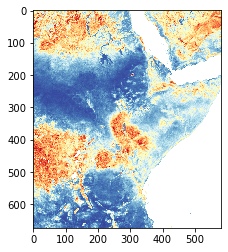

In [47]:
plt.imshow(ps_pi18_prtp_rs, vmin = 0, vmax = 1, cmap = 'RdYlBu')

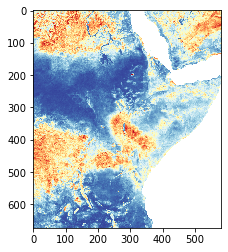

In [48]:
plt.imshow(ps_pi18_smet_rs, vmin = 0 , vmax = 1, cmap = 'RdYlBu')

In [46]:
ps_pi18_prtp_rs

array([[0.71883088, 0.64718418, 0.55992433, ..., 0.48949981, 0.47843651,
        0.35679494],
       [0.68432139, 0.61845739, 0.56674393, ..., 0.46756565, 0.4758261 ,
        0.34392804],
       [0.53194663, 0.49004741, 0.5609877 , ..., 0.49789228, 0.47525843,
        0.42658632],
       ...,
       [0.91414697, 0.92990651, 0.91992646, ...,        nan,        nan,
               nan],
       [0.90330423, 0.89803325, 0.89236684, ...,        nan,        nan,
               nan],
       [0.92736006, 0.91385572, 0.92822194, ...,        nan,        nan,
               nan]])

In [45]:
ps_pi18_smet_rs

array([[0.7663862 , 0.62967525, 0.61055086, ..., 0.47231294, 0.48320023,
        0.30409545],
       [0.68702452, 0.63783001, 0.63180046, ..., 0.50309281, 0.48806081,
        0.33907377],
       [0.59473805, 0.56706169, 0.6204794 , ..., 0.5229683 , 0.50368813,
        0.4239253 ],
       ...,
       [0.91789425, 0.93334616, 0.91078363, ...,        nan,        nan,
               nan],
       [0.90438309, 0.89885482, 0.87539051, ...,        nan,        nan,
               nan],
       [0.92440978, 0.917997  , 0.91746679, ...,        nan,        nan,
               nan]])